<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220531_DA10_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. 한글 폰트 설치

In [15]:
# Jupyter notebook 환경에서 리눅스 명령어 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## Step 2. Colab Runtime 재시작 (Ctrl + M .)

## Step 3. matplotlib 패키지에서 한글 폰트를 사용할 수 있게 설정.

In [16]:
import matplotlib.pyplot as plt

# pyplot에서 나눔바른고딕 폰트를 사용하도록 설정
plt.rc('font', family='NanumBarunGothic')

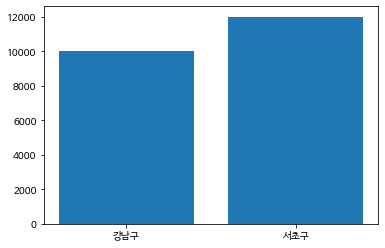

In [17]:
# 한글 폰트 테스트
import pandas as pd

df = pd.DataFrame({'gu' : ['강남구', '서초구'],
                   'price' : [10_000, 12_000]})

plt.bar(x=df['gu'], height=df['price'])
plt.show()

# Apt 데이터 셋

* apt_201910.csv 파일을 읽고 DataFrame 생성
    * encoding 파라미터 설정
    * '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        * '가격' 컬럼은 숫자 타입이어야 함!
* 데이터 프레임 파악
    * info, head, tail, describe, dtypes, ...
* '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    * '강원도 강릉시 견소동' -> '강원도'
* '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    * 201910 -> 2019, 10
* 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
* 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 $84m^2$이상 $100m^2$미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 $84m^2$이상 $100m^2$미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    * 결과를 평균의 내림차순으로 정렬해서 출력
    * 결과를 최댓값의 내림차순으로 정렬해서 출력
    * 결과를 최솟값의 오름차순으로 정렬해서 출력

# 필요한 라이브러리 import

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 불러오기

In [19]:
file_path = 'https://raw.githubusercontent.com/JakeOh/202205_itw_bd34/main/datasets/apt_201910.csv'

In [20]:
apt = pd.read_csv(file_path, encoding='cp949', thousands=',')
# encoding : 파일에서 사용된 문자열 셋의 종류. 기본값은 'utf-8'.
# 한글 MS-Windows의 기본 텍스트 인코딩은 'cp949'.
# thousands : 숫자에서 천자리 구분자가 사용되고 있을 때
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22
...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32


## 가격 column 숫자 타입으로 변환

In [21]:
# apt['가격'] = apt['가격'].str.replace(',', '').astype('int64')
# apt['가격']

# 데이터프레임 파악

In [22]:
# 요약 정보
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [23]:
# = apt.iloc[:5]
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [24]:
# = apt.iloc[-5:]
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [25]:
# 기술통계량
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


In [26]:
# column 타입 확인
apt.dtypes

시군구      object
번지       object
본번       object
부번        int64
단지명      object
면적      float64
계약년월      int64
계약일       int64
가격        int64
층         int64
건축년도      int64
도로명      object
dtype: object

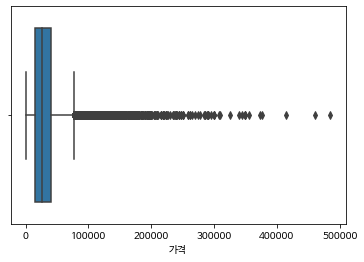

In [27]:
# 아파트 가격의 분포 시각화
sns.boxplot(x='가격', data=apt)
plt.show()

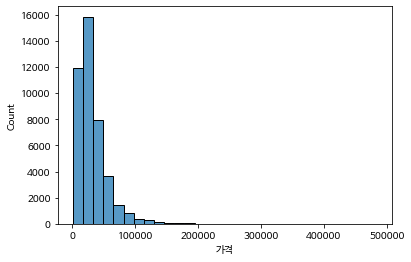

In [28]:
sns.histplot(x='가격', data=apt, bins=30)
plt.show()

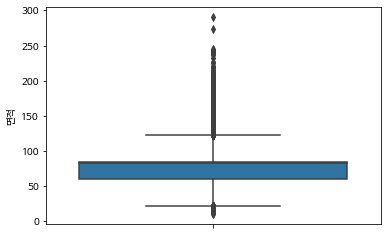

In [29]:
sns.boxplot(y='면적', data=apt)
plt.show()

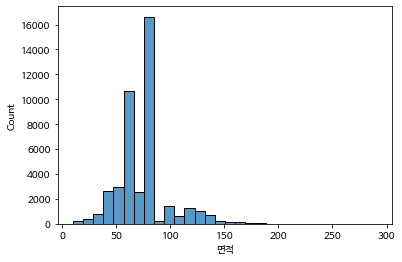

In [30]:
sns.histplot(x='면적', data=apt, bins=30)
plt.show()

# 파생변수 생성

## '시군구' → province(도, 광역시 이름)

In [31]:
apt['province'] = apt['시군구'].str.split(' ').str[0]
apt['province']

0         강원도
1         강원도
2         강원도
3         강원도
4         강원도
         ... 
42753    충청북도
42754    충청북도
42755    충청북도
42756    충청북도
42757    충청북도
Name: province, Length: 42758, dtype: object

In [32]:
apt['province'].value_counts().sort_index()

강원도         1143
경기도        12126
경상남도        2955
경상북도        1985
광주광역시       1588
대구광역시       1969
대전광역시       2487
부산광역시       2752
서울특별시       4701
세종특별자치시      315
울산광역시       1562
인천광역시       2761
전라남도        1234
전라북도        1394
제주특별자치도      165
충청남도        2045
충청북도        1576
Name: province, dtype: int64

### county (시,군,구) / dong (동)

In [33]:
apt['county'] = apt['시군구'].str.split().str[1]

In [34]:
apt['dong'] = apt['시군구'].str.split().str[-1]

In [35]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시,호암동
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시,호암동
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시,호암동
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시,호암동
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32,충청북도,충주시,호암동


## '계약년월' → year(계약년도), month(계약월)

In [36]:
apt['year'] = apt['계약년월'].astype('str').str[0:4].astype('int64')
print(apt['year'])
apt['month'] = apt['계약년월'].astype('str').str[-2:].astype('int64')
print(apt['month'])

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
42753    2019
42754    2019
42755    2019
42756    2019
42757    2019
Name: year, Length: 42758, dtype: int64
0        10
1        10
2        10
3        10
4        10
         ..
42753    10
42754    10
42755    10
42756    10
42757    10
Name: month, Length: 42758, dtype: int64


# EDA

## 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값

In [37]:
apt_seoul = apt[apt['province'] == '서울특별시']
apt_seoul

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,강남구,개포동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,중랑구,중화동,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,중랑구,중화동,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,중랑구,중화동,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,중랑구,중화동,2019,10


In [38]:
dong = apt_seoul['시군구'].str.split(" ").str[-1]
apt_dong = apt_seoul.groupby(dong)['가격']

In [39]:
apt_dong.count()

시군구
가락동      22
가산동       6
가양동      43
갈현동       5
강일동      19
         ..
회현동1가     3
효창동       6
후암동       3
휘경동      18
흑석동      14
Name: 가격, Length: 247, dtype: int64

In [40]:
apt_dong.mean()

시군구
가락동       78695.454545
가산동       40550.000000
가양동       49988.372093
갈현동       38400.000000
강일동       67026.315789
             ...      
회현동1가    125500.000000
효창동       87500.000000
후암동       78066.666667
휘경동       53711.111111
흑석동      105385.714286
Name: 가격, Length: 247, dtype: float64

In [41]:
apt_dong.min()

시군구
가락동       16000
가산동       20300
가양동       33500
갈현동       27000
강일동       58500
          ...  
회현동1가    113000
효창동       59000
후암동       30200
휘경동       33000
흑석동       55700
Name: 가격, Length: 247, dtype: int64

In [42]:
apt_dong.max()

시군구
가락동      110000
가산동       53500
가양동      114000
갈현동       60000
강일동       85000
          ...  
회현동1가    143500
효창동      130000
후암동      129000
휘경동       81500
흑석동      140000
Name: 가격, Length: 247, dtype: int64

In [43]:
apt_dong_m = apt_dong.agg(['count', 'median', 'mean', 'min', 'max'])
apt_dong_m

,count,median,mean,min,max
시군구,,,,,
가락동,22,79750.0,78695.454545,16000,110000
가산동,6,47250.0,40550.000000,20300,53500
가양동,43,44750.0,49988.372093,33500,114000
갈현동,5,30000.0,38400.000000,27000,60000
강일동,19,66900.0,67026.315789,58500,85000
...,...,...,...,...,...
회현동1가,3,120000.0,125500.000000,113000,143500
효창동,6,75500.0,87500.000000,59000,130000
후암동,3,75000.0,78066.666667,30200,129000


###서울 구별 아파트 거래 건수, 거래 가격 평균,최솟값,중앙값,최댓값

In [57]:
apt_gu = apt_seoul.groupby('county')['가격'].agg(['count', 'mean', 'median', 'min', 'max'])
apt_gu

,count,mean,median,min,max
county,,,,,
강남구,146,156752.739726,143500.0,20500,461000
강동구,254,76776.259843,69000.0,9000,175000
강북구,82,50530.487805,50150.0,19500,88000
강서구,276,58559.420290,54900.0,10200,133000
관악구,166,53410.228916,55000.0,13000,89900
광진구,132,95781.060606,90600.0,25500,185000
구로구,331,52736.495468,49000.0,9500,136500
금천구,149,42771.664430,39700.0,9000,93000
노원구,499,42058.597194,38400.0,8500,97000


## 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [44]:
apt_si = apt.groupby('province')['가격']

In [45]:
apt_si.count()

province
강원도         1143
경기도        12126
경상남도        2955
경상북도        1985
광주광역시       1588
대구광역시       1969
대전광역시       2487
부산광역시       2752
서울특별시       4701
세종특별자치시      315
울산광역시       1562
인천광역시       2761
전라남도        1234
전라북도        1394
제주특별자치도      165
충청남도        2045
충청북도        1576
Name: 가격, dtype: int64

In [46]:
apt_si.mean()

province
강원도        14305.559930
경기도        36447.593765
경상남도       20157.054484
경상북도       15304.175819
광주광역시      21786.904282
대구광역시      28031.251397
대전광역시      27591.418979
부산광역시      29593.587209
서울특별시      69302.919166
세종특별자치시    33577.206349
울산광역시      26581.768246
인천광역시      30196.960884
전라남도       14523.552674
전라북도       14655.274032
제주특별자치도    25878.181818
충청남도       17494.407824
충청북도       18068.494289
Name: 가격, dtype: float64

In [47]:
apt_si.min()

province
강원도         950
경기도        2700
경상남도       2700
경상북도        600
광주광역시      4150
대구광역시      1500
대전광역시      2400
부산광역시      1500
서울특별시      8500
세종특별자치시    2880
울산광역시      4000
인천광역시      4000
전라남도       1330
전라북도        900
제주특별자치도    6000
충청남도       1500
충청북도       1100
Name: 가격, dtype: int64

In [48]:
apt_si.max()

province
강원도         45800
경기도        262000
경상남도        83200
경상북도        50000
광주광역시      115000
대구광역시      173500
대전광역시      150000
부산광역시      376640
서울특별시      485000
세종특별자치시     82200
울산광역시       81000
인천광역시      300000
전라남도        61800
전라북도        68700
제주특별자치도     76500
충청남도        90000
충청북도        96000
Name: 가격, dtype: int64

In [49]:
apt_si_m = apt_si.agg(['count', 'mean', 'min', 'median', 'max'])
apt_si_m

,count,mean,min,median,max
province,,,,,
강원도,1143,14305.559930,950,13098.0,45800
경기도,12126,36447.593765,2700,31700.0,262000
경상남도,2955,20157.054484,2700,17800.0,83200
경상북도,1985,15304.175819,600,14500.0,50000
광주광역시,1588,21786.904282,4150,18675.0,115000
대구광역시,1969,28031.251397,1500,25300.0,173500
대전광역시,2487,27591.418979,2400,24500.0,150000
부산광역시,2752,29593.587209,1500,25200.0,376640
서울특별시,4701,69302.919166,8500,60000.0,485000


## 거래 건수 상위 10개 지역 (동)

In [50]:
count_top10 = apt_dong_m.sort_values(by='count', ascending=False).head(10)
count_top10

,count,median,mean,min,max
시군구,,,,,
상계동,198,38000.0,40474.242424,23200,78000
구로동,120,46175.0,47075.250000,9800,118000
중계동,108,39000.0,46145.740741,16300,97000
시흥동,101,38600.0,39634.435644,9000,86000
봉천동,97,59500.0,56228.340206,13000,89900
신월동,78,38775.0,41164.102564,17500,79000
공릉동,78,36000.0,37887.179487,8500,71500
신정동,77,69000.0,74342.207792,29950,176000
창동,76,42000.0,44913.815789,18700,88000


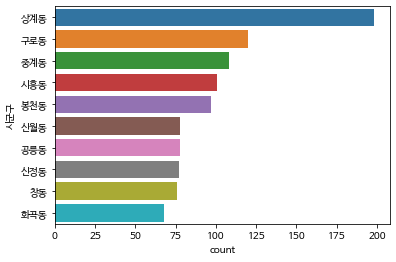

In [51]:
sns.barplot(x='count', y=count_top10.index, data=count_top10)
plt.show()

## 아파트 거래 가격의 평균 상위 10개 지역(동)

In [52]:
mean_top10 = apt_dong_m.sort_values(by='mean', ascending=False).head(10)
mean_top10

,count,median,mean,min,max
시군구,,,,,
압구정동,10,249500.0,263250.000000,170000,355000
반포동,17,210700.0,224200.000000,87700,415000
잠원동,15,178000.0,194313.333333,109000,295000
대치동,22,190000.0,192795.454545,30000,373000
잠실동,22,191250.0,191459.090909,145000,308000
홍파동,2,176500.0,176500.000000,159000,194000
한강로3가,1,175000.0,175000.000000,175000,175000
여의도동,8,164000.0,172562.500000,105000,259000
청담동,10,173500.0,170200.000000,75000,300000


### 거래 건수가 10건 이상인 지역(동)에서 거래 가격 평균 상위 10개

In [82]:
mean_top10 = apt_dong_m[apt_dong_m['count'] >= 10].sort_values(by='mean',
             ascending=False).head(10)
mean_top10

,count,median,mean,min,max
시군구,,,,,
압구정동,10,249500.0,263250.000000,170000,355000
반포동,17,210700.0,224200.000000,87700,415000
잠원동,15,178000.0,194313.333333,109000,295000
대치동,22,190000.0,192795.454545,30000,373000
잠실동,22,191250.0,191459.090909,145000,308000
청담동,10,173500.0,170200.000000,75000,300000
도곡동,23,155000.0,169347.826087,31800,461000
신천동,11,158000.0,154681.818182,82000,227500
방배동,31,128000.0,142812.903226,57000,250000


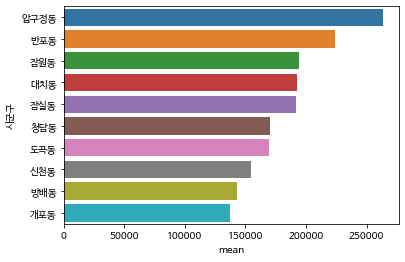

In [54]:
sns.barplot(x='mean', y=mean_top10.index, data=mean_top10)
plt.show()

## 아파트 거래 가격 최댓값 상위 10개 지역(동)

In [55]:
max_top10 = apt_dong_m.sort_values(by='max', ascending=False).head(10)
max_top10

,count,median,mean,min,max
시군구,,,,,
한남동,6,100500.0,159666.666667,27000,485000
도곡동,23,155000.0,169347.826087,31800,461000
반포동,17,210700.0,224200.000000,87700,415000
대치동,22,190000.0,192795.454545,30000,373000
압구정동,10,249500.0,263250.000000,170000,355000
잠실동,22,191250.0,191459.090909,145000,308000
청담동,10,173500.0,170200.000000,75000,300000
잠원동,15,178000.0,194313.333333,109000,295000
삼성동,7,150000.0,168714.285714,103000,290000


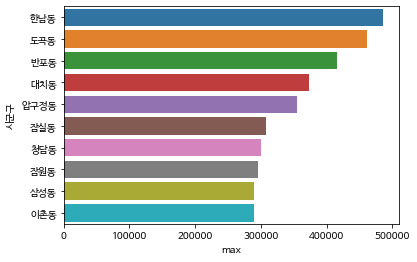

In [56]:
sns.barplot(x='max', y=max_top10.index, data=max_top10)
plt.show()

### 거래 건수 상위 5개 광역시도

In [58]:
count_top5 = apt_si_m.sort_values(by='count', ascending=False).head(5)
count_top5

,count,mean,min,median,max
province,,,,,
경기도,12126,36447.593765,2700,31700.0,262000
서울특별시,4701,69302.919166,8500,60000.0,485000
경상남도,2955,20157.054484,2700,17800.0,83200
인천광역시,2761,30196.960884,4000,27000.0,300000
부산광역시,2752,29593.587209,1500,25200.0,376640


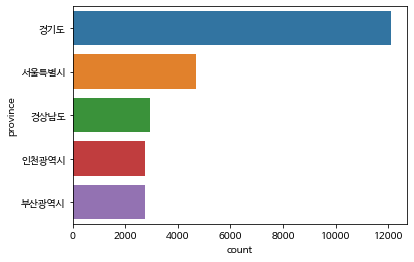

In [59]:
sns.barplot(x='count', y=count_top5.index, data=count_top5)
plt.show()

### 거래 가격 평균 상위 5개 광역시도

In [60]:
mean_top5 = apt_si_m.sort_values(by='mean', ascending=False).head()
mean_top5

,count,mean,min,median,max
province,,,,,
서울특별시,4701,69302.919166,8500,60000.0,485000
경기도,12126,36447.593765,2700,31700.0,262000
세종특별자치시,315,33577.206349,2880,32000.0,82200
인천광역시,2761,30196.960884,4000,27000.0,300000
부산광역시,2752,29593.587209,1500,25200.0,376640


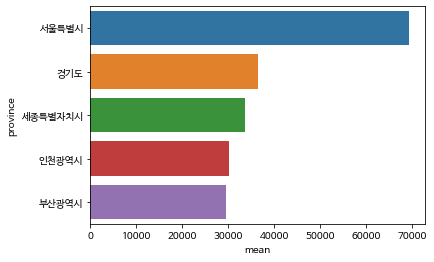

In [61]:
sns.barplot(x='mean', y=mean_top5.index, data=mean_top5)
plt.show()

##  면적이 $84m^2$이상 $100m^2$미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [62]:
apt_seoul2 = apt_seoul[(apt_seoul['면적'] >= 84) & (apt_seoul['면적'] < 100)]
apt_seoul2

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,서울특별시,강남구,논현동,2019,10
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,서울특별시,강남구,대치동,2019,10
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,서울특별시,강남구,대치동,2019,10
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,서울특별시,강남구,대치동,2019,10
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,서울특별시,강남구,대치동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,서울특별시,중랑구,신내동,2019,10
31692,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,서울특별시,중랑구,신내동,2019,10
31693,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,서울특별시,중랑구,신내동,2019,10
31694,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,서울특별시,중랑구,신내동,2019,10


In [63]:
apt_dong2 = apt_seoul2.groupby(dong)['가격']

In [64]:
apt_dong2.count()

시군구
가락동     7
가산동     2
가양동     4
강일동    15
개봉동    12
       ..
황학동     8
회기동     1
효창동     4
휘경동     5
흑석동     8
Name: 가격, Length: 193, dtype: int64

In [65]:
apt_dong2.mean()

시군구
가락동     85485.714286
가산동     52500.000000
가양동     76100.000000
강일동     66980.000000
개봉동     55966.666667
           ...      
황학동     77562.500000
회기동     78500.000000
효창동     95500.000000
휘경동     64340.000000
흑석동    114275.000000
Name: 가격, Length: 193, dtype: float64

In [66]:
apt_dong2.min()

시군구
가락동    77000
가산동    51500
가양동    59000
강일동    62000
개봉동    43000
       ...  
황학동    75000
회기동    78500
효창동    66000
휘경동    58000
흑석동    76500
Name: 가격, Length: 193, dtype: int64

In [67]:
apt_dong2.max()

시군구
가락동    107000
가산동     53500
가양동     95000
강일동     70500
개봉동     70000
        ...  
황학동     79800
회기동     78500
효창동    130000
휘경동     71000
흑석동    130000
Name: 가격, Length: 193, dtype: int64

In [68]:
apt_dong2 = apt_dong2.agg(['count', 'mean', 'min', 'median', 'max'])
apt_dong2

,count,mean,min,median,max
시군구,,,,,
가락동,7,85485.714286,77000,83900.0,107000
가산동,2,52500.000000,51500,52500.0,53500
가양동,4,76100.000000,59000,75200.0,95000
강일동,15,66980.000000,62000,66900.0,70500
개봉동,12,55966.666667,43000,56750.0,70000
...,...,...,...,...,...
황학동,8,77562.500000,75000,77900.0,79800
회기동,1,78500.000000,78500,78500.0,78500
효창동,4,95500.000000,66000,93000.0,130000


In [69]:
apt_dong2.sort_values(by='count', ascending=False)

,count,mean,min,median,max
시군구,,,,,
구로동,35,60861.428571,37500,56000.0,87000
봉천동,31,65812.903226,48000,64800.0,80500
상도동,29,94348.275862,44000,95500.0,120000
목동,26,99382.692308,46650,91000.0,160000
중계동,24,63502.083333,44000,60950.0,90000
...,...,...,...,...,...
창신동,1,83500.000000,83500,83500.0,83500
양평동2가,1,57000.000000,57000,57000.0,57000
안암동1가,1,68400.000000,68400,68400.0,68400


In [70]:
apt_dong2.sort_values(by='mean', ascending=False)

,count,mean,min,median,max
시군구,,,,,
반포동,6,244833.333333,130000,243000.0,340000
대치동,8,207000.000000,137000,200000.0,277000
잠원동,8,195275.000000,109000,199000.0,285000
삼성동,2,188500.000000,118000,188500.0,259000
서빙고동,1,183000.000000,183000,183000.0,183000
...,...,...,...,...,...
궁동,1,43000.000000,43000,43000.0,43000
도봉동,22,41895.454545,34700,41500.0,51600
구산동,4,40200.000000,35000,41250.0,43300


## 면적이 $84m^2$이상 $100m^2$미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [71]:
apt_1 = apt[(apt['면적'] >= 84) & (apt['면적'] < 100)]

In [72]:
apt_si2 = apt_1.groupby('province')['가격']

In [73]:
apt_si2.count()

province
강원도         393
경기도        4659
경상남도       1171
경상북도        731
광주광역시       612
대구광역시       758
대전광역시      1066
부산광역시       886
서울특별시      1511
세종특별자치시     156
울산광역시       657
인천광역시       922
전라남도        394
전라북도        508
제주특별자치도      56
충청남도        725
충청북도        499
Name: 가격, dtype: int64

In [74]:
# 결과를 평균의 내림차순으로 정렬해서 출력
apt_si2.mean().sort_values(ascending=False)

province
서울특별시      79348.775645
경기도        39507.718395
세종특별자치시    38979.487179
부산광역시      36020.182844
인천광역시      34813.131236
대구광역시      33837.645119
제주특별자치도    33226.785714
울산광역시      31650.003044
대전광역시      30905.909944
광주광역시      28226.101307
경상남도       24684.422716
충청남도       23877.680000
충청북도       21989.987976
경상북도       20489.586867
전라남도       20069.162437
강원도        19480.854962
전라북도       19120.515748
Name: 가격, dtype: float64

In [75]:
# 결과를 최댓값의 내림차순으로 정렬해서 출력
apt_si2.max().sort_values(ascending=False)

province
서울특별시      340000
경기도        165000
대구광역시       91000
대전광역시       89500
인천광역시       85500
부산광역시       85000
제주특별자치도     75000
세종특별자치시     74000
광주광역시       70500
경상남도        69400
충청남도        67200
울산광역시       65000
경상북도        47250
강원도         45800
충청북도        43000
전라남도        40400
전라북도        37300
Name: 가격, dtype: int64

In [76]:
# 결과를 최솟값의 오름차순으로 정렬해서 출력
apt_si2.min().sort_values()

province
전라남도        2950
경상북도        4500
전라북도        5000
강원도         5200
경상남도        5800
경기도         7000
충청남도        7400
대전광역시       7500
충청북도        7800
울산광역시       9000
부산광역시       9800
세종특별자치시    10000
인천광역시      10100
광주광역시      11500
대구광역시      11800
제주특별자치도    15800
서울특별시      27500
Name: 가격, dtype: int64

In [77]:
apt_si2 = apt_si2.agg(['count', 'mean', 'min', 'median', 'max'])
apt_si2

,count,mean,min,median,max
province,,,,,
강원도,393,19480.854962,5200,18700.0,45800
경기도,4659,39507.718395,7000,35500.0,165000
경상남도,1171,24684.422716,5800,23000.0,69400
경상북도,731,20489.586867,4500,20500.0,47250
광주광역시,612,28226.101307,11500,25700.0,70500
대구광역시,758,33837.645119,11800,30725.0,91000
대전광역시,1066,30905.909944,7500,27800.0,89500
부산광역시,886,36020.182844,9800,34000.0,85000
서울특별시,1511,79348.775645,27500,71700.0,340000


In [78]:
apt_si2.sort_values(by='count', ascending=False)

,count,mean,min,median,max
province,,,,,
경기도,4659,39507.718395,7000,35500.0,165000
서울특별시,1511,79348.775645,27500,71700.0,340000
경상남도,1171,24684.422716,5800,23000.0,69400
대전광역시,1066,30905.909944,7500,27800.0,89500
인천광역시,922,34813.131236,10100,32000.0,85500
부산광역시,886,36020.182844,9800,34000.0,85000
대구광역시,758,33837.645119,11800,30725.0,91000
경상북도,731,20489.586867,4500,20500.0,47250
충청남도,725,23877.680000,7400,22000.0,67200


In [79]:
apt_si2.sort_values(by='mean', ascending=False)

,count,mean,min,median,max
province,,,,,
서울특별시,1511,79348.775645,27500,71700.0,340000
경기도,4659,39507.718395,7000,35500.0,165000
세종특별자치시,156,38979.487179,10000,39000.0,74000
부산광역시,886,36020.182844,9800,34000.0,85000
인천광역시,922,34813.131236,10100,32000.0,85500
대구광역시,758,33837.645119,11800,30725.0,91000
제주특별자치도,56,33226.785714,15800,30650.0,75000
울산광역시,657,31650.003044,9000,30800.0,65000
대전광역시,1066,30905.909944,7500,27800.0,89500
